    ---
    layout: post
    title: Introduction to Pandas 4
    excerpt:
    categories: blog
    tags: ["Python", "Data Science", "Pandas"]
    published: true
    comments: true
    share: true
    ---



Let;s get our hands dirty with another important topic in Pandas. We need to able to handle missing data and we will see some methods to handle them. After making our data more suitable for analysis, or prediction we will learn how to plot it with ```matplotlib``` library.  

> I am going to use matplotlib library for this post and other pandas tutorials but I normally prefer using bokeh interactive plotting library. 

If you like to follow this small tutorial in notebook format you can check out [here](https://github.com/eneskemalergin/Blog-Notebooks/blob/master/Introduction_to_Pandas-4.ipynb)

## Handling Missing Data

Missing data is usually shows up as ```NULL``` or ```N/A``` or **```NaN```** (Pandas represents this way.)
Other than appearing natively in the source dataset, missing values can be added to a dataset by an operation such as reindexing, or changing frequencies in the case of a time series:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
date_stngs = ['2014-05-01','2014-05-02','2014-05-05','2014-05-06','2014-05-07']
tradeDates = pd.to_datetime(pd.Series(date_stngs))
closingPrices=[531.35,527.93,527.81,515.14,509.96]
googClosingPrices=pd.DataFrame(data=closingPrices, columns=['closingPrice'], index=tradeDates)
googClosingPrices

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


Pandas is also provides a very easy and fast API to read stock data from various finance data providers. 

In [5]:
from pandas_datareader import data, wb # pandas data READ API
import datetime

In [9]:
googPrices = data.get_data_yahoo("GOOG", start=datetime.datetime(2014, 5, 1), 
                                 end=datetime.datetime(2014, 5, 7))

In [10]:
googFinalPrices=pd.DataFrame(googPrices['Close'], index=tradeDates)
googFinalPrices

,Close
2014-05-01,531.352435
2014-05-02,527.932411
2014-05-05,527.812392
2014-05-06,515.142330
2014-05-07,509.962321


We now have a time series that depicts the closing price of Google's stock from May 1, 2014 to May 7, 2014 with gaps in the date range since the trading only occur on business days. If we want to change the date range so that it shows calendar days (that is, along with the weekend), we can change the frequency of the time series index from business days to calendar days as follow:

In [11]:
googClosingPricesCDays = googClosingPrices.asfreq('D')
googClosingPricesCDays

,closingPrice
2014-05-01,531.35
2014-05-02,527.93
2014-05-03,NaN
2014-05-04,NaN
2014-05-05,527.81
2014-05-06,515.14
2014-05-07,509.96


Note that we have now introduced NaN values for the closingPrice for the weekend dates of May 3, 2014 and May 4, 2014. 

We can check which values are missing by using the ```isnull()``` and ```notnull()``` functions as follows:

In [14]:
googClosingPricesCDays.isnull()

,closingPrice
2014-05-01,False
2014-05-02,False
2014-05-03,True
2014-05-04,True
2014-05-05,False
2014-05-06,False
2014-05-07,False


In [15]:
googClosingPricesCDays.notnull()

,closingPrice
2014-05-01,True
2014-05-02,True
2014-05-03,False
2014-05-04,False
2014-05-05,True
2014-05-06,True
2014-05-07,True


A Boolean DataFrame is returned in each case. In datetime and pandas Timestamps, missing values are represented by the NaT value. This is the equivalent of NaN in pandas for time-based types

In [17]:
tDates=tradeDates.copy()
tDates[1]=np.NaN
tDates[4]=np.NaN
tDates

In [20]:
FBVolume=[82.34,54.11,45.99,55.86,78.5]
TWTRVolume=[15.74,12.71,10.39,134.62,68.84]
socialTradingVolume=pd.concat([pd.Series(FBVolume), pd.Series(TWTRVolume),
                               tradeDates], axis=1,keys=['FB','TWTR','TradeDate'])
socialTradingVolume

,FB,TWTR,TradeDate
0,82.34,15.74,2014-05-01
1,54.11,12.71,2014-05-02
2,45.99,10.39,2014-05-05
3,55.86,134.62,2014-05-06
4,78.50,68.84,2014-05-07


In [21]:
socialTradingVolTS=socialTradingVolume.set_index('TradeDate')
socialTradingVolTS

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [22]:
socialTradingVolTSCal=socialTradingVolTS.asfreq('D')
socialTradingVolTSCal

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


We can perform arithmetic operations on data containing missing values. For example, we can calculate the total trading volume (in millions of shares) across the two stocks for Facebook and Twitter as follows:

In [23]:
socialTradingVolTSCal['FB']+socialTradingVolTSCal['TWTR']

TradeDate
2014-05-01     98.08
2014-05-02     66.82
2014-05-03       NaN
2014-05-04       NaN
2014-05-05     56.38
2014-05-06    190.48
2014-05-07    147.34
Freq: D, dtype: float64

By default, any operation performed on an object that contains missing values will return a missing value at that position as shown in the following command:

In [24]:
pd.Series([1.0,np.NaN,5.9,6])+pd.Series([3,5,2,5.6])

0     4.0
1     NaN
2     7.9
3    11.6
dtype: float64

In [25]:
pd.Series([1.0,25.0,5.5,6])/pd.Series([3,np.NaN,2,5.6])

0    0.333333
1         NaN
2    2.750000
3    1.071429
dtype: float64

There is a difference, however, in the way NumPy treats aggregate calculations versus what pandas does.

In pandas, the default is to treat the missing value as 0 and do the aggregate calculation, whereas for NumPy, NaN is returned if any of the values are missing. Here is an illustration:

In [26]:
np.mean([1.0,np.NaN,5.9,6])

nan

In [27]:
np.sum([1.0,np.NaN,5.9,6])

nan

However, if this data is in a pandas Series, we will get the following output:

In [28]:
pd.Series([1.0,np.NaN,5.9,6]).sum()

12.9

In [29]:
pd.Series([1.0,np.NaN,5.9,6]).mean()

4.3

It is important to be aware of this difference in behavior between pandas and NumPy. However, if we wish to get NumPy to behave the same way as pandas, we can use the np.nanmean and np.nansum functions, which are illustrated as follows:

In [30]:
np.nanmean([1.0,np.NaN,5.9,6])

4.2999999999999998

In [31]:
np.nansum([1.0,np.NaN,5.9,6])

12.9

## Handling Missing Values
There are various ways to handle missing values, which are as follows:

__ 1. By using the ```fillna()``` function to fill in the NA values:__

In [32]:
socialTradingVolTSCal

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,NaN,NaN
2014-05-04,NaN,NaN
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [33]:
socialTradingVolTSCal.fillna(100)

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,100.00,100.00
2014-05-04,100.00,100.00
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


We can also fill forward or backward values using the ```ffill()``` or ```bfill()``` arguments:

In [34]:
socialTradingVolTSCal.fillna(method='ffill')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,54.11,12.71
2014-05-04,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


In [35]:
socialTradingVolTSCal.fillna(method='bfill')

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-03,45.99,10.39
2014-05-04,45.99,10.39
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


__2. By using the ```dropna()``` function to drop/delete rows and columns with missing values.__

In [36]:
socialTradingVolTSCal.dropna()

,FB,TWTR
TradeDate,,
2014-05-01,82.34,15.74
2014-05-02,54.11,12.71
2014-05-05,45.99,10.39
2014-05-06,55.86,134.62
2014-05-07,78.50,68.84


__3. We can also interpolate and fill in the missing values by using the ```interpolate()``` function__

In [37]:
pd.set_option('display.precision',4)
socialTradingVolTSCal.interpolate()

,FB,TWTR
TradeDate,,
2014-05-01,82.3400,15.7400
2014-05-02,54.1100,12.7100
2014-05-03,51.4033,11.9367
2014-05-04,48.6967,11.1633
2014-05-05,45.9900,10.3900
2014-05-06,55.8600,134.6200
2014-05-07,78.5000,68.8400


The ```interpolate()``` function also takes an argument—method that denotes the method. These methods include linear, quadratic, cubic spline, and so on.

## Plotting using matplotlib
The matplotlib api is imported using the standard convention, as shown in the following command: ```import matplotlib.pyplot as plt```

Series and DataFrame have a plot method, which is simply a wrapper around ```plt.plot``` . Here, we will examine how we can do a simple plot of a sine and cosine function. Suppose we wished to plot the following functions over the interval pi to pi:

$$
f(x) = \cos(x) + \sin(x) \\
g(x) = \cos(x) - \sin(x)
$$

In [39]:
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
f,g = np.cos(X)+np.sin(X), np.sin(X)-np.cos(X)
f_ser=pd.Series(f)
g_ser=pd.Series(g)

In [40]:
plotDF=pd.concat([f_ser,g_ser],axis=1)
plotDF.index=X
plotDF.columns=['sin(x)+cos(x)','sin(x)-cos(x)']
plotDF.head()

,sin(x)+cos(x),sin(x)-cos(x)
-3.1416,-1.0000,1.0000
-3.1170,-1.0243,0.9751
-3.0923,-1.0480,0.9495
-3.0677,-1.0711,0.9234
-3.0430,-1.0935,0.8967


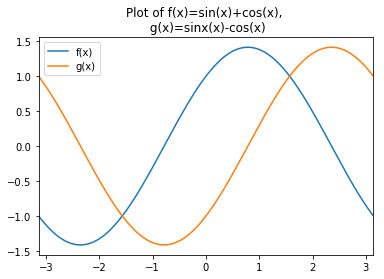

In [47]:
plotDF.columns=['f(x)','g(x)']
plotDF.plot(title='Plot of f(x)=sin(x)+cos(x), \n g(x)=sinx(x)-cos(x)')
plt.show()

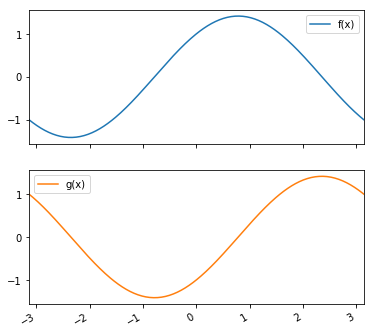

In [48]:
plotDF.plot(subplots=True, figsize=(6,6))
plt.show()

There is a lot more to using the plotting functionality of matplotlib within pandas. For more information, take a look at the [documentation](http://pandas.pydata.org/pandas-docs/dev/visualization.html)

### Summary 
To summarize, we have discussed how to handle missing data values and manipulate dates in pandas. We also took a brief detour to investigate the plotting functionality in pandas using matplotlib .